### Example

In [ ]:
# Import relevant libraries
%config InlineBackend.figure_format = 'svg'
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import os.path as path

In [ ]:
# Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import a wages dataset (https://www.kaggle.com/datasets/ljanjughazyan/wages)
df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/wages.csv")

In [ ]:
# Rename the columns
df.rename(columns = {'earn':'wage', 'ed':'education'}, inplace = True)

In [ ]:
# Visualise the data
display(df)

,wage,height,sex,race,education,age
0,79571.299011,73.89,male,white,16,49
1,96396.988643,66.23,female,white,16,62
2,48710.666947,63.77,female,white,16,33
3,80478.096153,63.22,female,other,16,95
4,82089.345498,63.08,female,white,17,43
...,...,...,...,...,...,...
1374,30173.380363,71.68,male,white,12,33
1375,24853.519514,61.31,female,white,18,86
1376,13710.671312,63.64,female,white,12,37
1377,95426.014410,71.65,male,white,12,54


### SLR

In [ ]:
# Define the model
model_1 = smf.ols('wage ~ education', data=df)

# Fit the model
regression_1 = model_1.fit()

# Print the results
print(regression_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     192.7
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           4.19e-41
Time:                        11:29:43   Log-Likelihood:                -16139.
No. Observations:                1379   AIC:                         3.228e+04
Df Residuals:                    1377   BIC:                         3.229e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.753e+04   4391.609     -6.268      0.0

### MLR

In [ ]:
# Define the model
model_2 = smf.ols('wage ~ education + age', data=df)

# Fit the model
regression_2 = model_2.fit()

# Print the results
print(regression_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     109.5
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           7.54e-45
Time:                        11:29:59   Log-Likelihood:                -16127.
No. Observations:                1379   AIC:                         3.226e+04
Df Residuals:                    1376   BIC:                         3.228e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.113e+04   5193.558     -7.920      0.0

### Non-linear terms

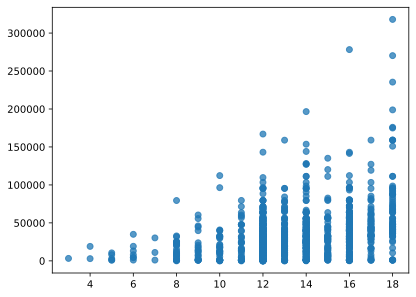

In [ ]:
# Plot age against wage
plt.scatter(df.education, df.wage, alpha = 0.75)
plt.show()

In [ ]:
# Define the model
model_3 = smf.ols('wage ~ education + education^2 + age', data=df)

# Fit the model
regression_3 = model_3.fit()

# Print the results
print(regression_3.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     75.75
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           2.40e-45
Time:                        11:30:59   Log-Likelihood:                -16123.
No. Observations:                1379   AIC:                         3.225e+04
Df Residuals:                    1375   BIC:                         3.228e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.732e+04   5370.507     -6.949

In [ ]:
# Define the model
model_4 = smf.ols('wage ~ education + age + age^2', data=df)

# Fit the model
regression_4 = model_4.fit()

# Print the results
print(regression_4.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     73.03
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           7.94e-44
Time:                        14:40:54   Log-Likelihood:                -16127.
No. Observations:                1379   AIC:                         3.226e+04
Df Residuals:                    1375   BIC:                         3.228e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.115e+04   5195.166     -7.921      0.0

### Dummies

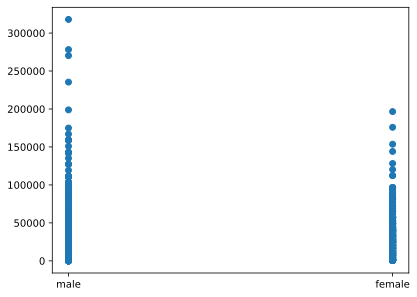

In [ ]:
# Visualise the gender gap
plt.scatter(df.sex, df.wage)
plt.show()

In [ ]:
# Define the model
model_5 = smf.ols('wage ~ sex + education + education^2 + age', data=df)

# Fit the model
regression_5 = model_5.fit()

# Print the results
print(regression_5.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     111.8
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           1.36e-82
Time:                        14:42:09   Log-Likelihood:                -16035.
No. Observations:                1379   AIC:                         3.208e+04
Df Residuals:                    1374   BIC:                         3.211e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.474e+04   5065.980     -8.832

### Categorical Variables (more than 2 categories)

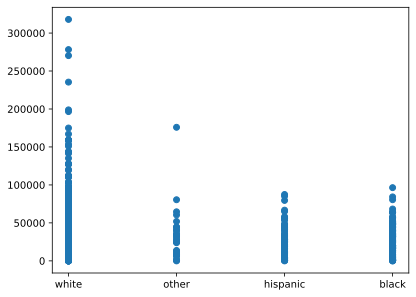

In [ ]:
# Visualise the race gap
plt.scatter(df.race, df.wage)
plt.show()

In [ ]:
# Define the model
model_6 = smf.ols('wage ~ sex + education + education^2 + age + race', data=df)

# Fit the model
regression_6 = model_6.fit()

# Print the results
print(regression_6.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     64.67
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           1.33e-80
Time:                        14:44:09   Log-Likelihood:                -16032.
No. Observations:                1379   AIC:                         3.208e+04
Df Residuals:                    1371   BIC:                         3.212e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -4.608e+04   5450.245  

Race is not significant in our model

### On the importance of control variables

In [ ]:
# Define the model
model_7 = smf.ols('wage ~ height', data=df)

# Fit the model
regression_7 = model_7.fit()

# Print the results
print(regression_7.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     128.0
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           1.96e-28
Time:                        14:50:41   Log-Likelihood:                -16168.
No. Observations:                1379   AIC:                         3.234e+04
Df Residuals:                    1377   BIC:                         3.235e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.265e+05   1.41e+04     -8.989      0.0

In [ ]:
# Define the model
model_7 = smf.ols('wage ~ height + education + sex', data=df)

# Fit the model
regression_7 = model_7.fit()

# Print the results
print(regression_7.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     132.8
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           1.42e-75
Time:                        14:51:23   Log-Likelihood:                -16053.
No. Observations:                1379   AIC:                         3.211e+04
Df Residuals:                    1375   BIC:                         3.214e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.376e+04   1.78e+04     -3.578      

Shows that it wasn't really height that was important but it was sex and education and height was correlated with these. You can see it is insignificant in the second model.